In [2]:
from alntk.alignment import Alignment, write_to_fasta
from alntk.plotting import default_plot_style
from alntk.pca import get_pca

import matplotlib.pyplot as plt
import numpy as np

In [3]:
data_folder = '../data/'
color_cycle = default_plot_style()

# Compare additional metrics for the chosen alignment

Some of these statistics require weights to be computed. The procedure to compute these weights is detailed in [this Kaggle notebook](https://www.kaggle.com/code/shoyip/compute-weights-of-alignments) which uses the adabmDCA adabmDCA. The resulting files are `new_aln_weights.txt` and `iter_aln_weights.txt`, respectively for the `new_aln.faa` and `iter_aln.faa` alignments. Each row corresponds to each sequence, sorted in the same order. Weights have been computed with a threshold of 0.8.

## Principal Component Analysis

Number of sequences: 93695
Number of positions: 693


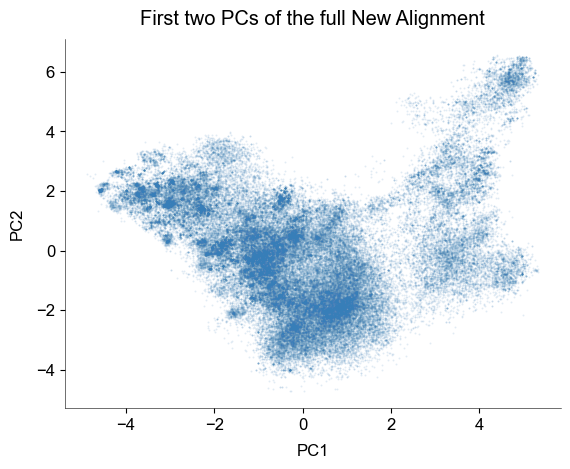

In [3]:
aln = Alignment()
aln.import_from_fasta(data_folder + 'new_aln.faa')
aln.print_report()

get_pca(aln, 'First two PCs of the full New Alignment')
plt.show()

Number of sequences: 93695
Number of positions: 260


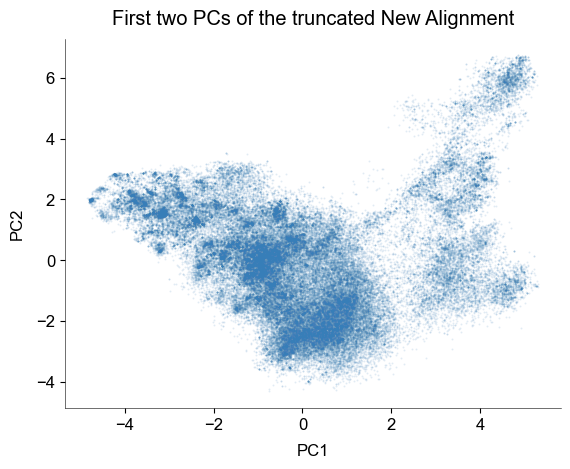

In [4]:
aln = Alignment()
aln.import_from_fasta(data_folder + 'iter_aln.faa')
aln.print_report()

get_pca(aln, 'First two PCs of the truncated New Alignment')
plt.show()

## Number of effective sequences

In [5]:
new_aln_w = np.loadtxt(data_folder + 'new_aln_weights.txt')
iter_aln_w = np.loadtxt(data_folder + 'iter_aln_weights.txt')

In [6]:
new_aln_w.shape, iter_aln_w.shape

((93695,), (93695,))

In [7]:
np.sum(new_aln_w)

5177.101070995501

In [8]:
np.sum(iter_aln_w)

22461.99751663464

## Distribution of correlation matrix elements

In [122]:
def get_histogram_values(correlation_matrix):
    counts, bin_edges = np.histogram(correlation_matrix[np.triu_indices(correlation_matrix.shape[0])], 100)
    bin_centers = (bin_edges[:-1] + bin_edges[1:])/2.
    return bin_centers, counts

In [123]:
corr_new = np.genfromtxt('../data/corr_new.csv', delimiter=',', dtype=float)
corr_shuffled_new = np.genfromtxt('../data/corr_shuffled_new.csv', delimiter=',', dtype=float)

In [130]:
corr_new_centers, corr_new_counts = get_histogram_values(corr_new)
corr_shuffled_new_centers, corr_shuffled_new_counts = get_histogram_values(corr_shuffled_new)

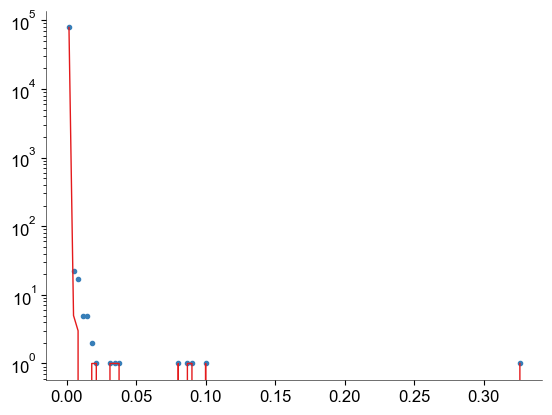

In [139]:
plt.figure()
plt.plot(corr_new_centers, corr_new_counts, '.')
plt.plot(corr_shuffled_new_centers, corr_shuffled_new_counts, '-')
plt.yscale('log')
plt.show()

In [140]:
corr_iter = np.genfromtxt('../data/corr_iter.csv', delimiter=',', dtype=float)
corr_shuffled_iter = np.genfromtxt('../data/corr_shuffled_iter.csv', delimiter=',', dtype=float)

In [141]:
corr_iter_centers, corr_iter_counts = get_histogram_values(corr_iter)
corr_shuffled_iter_centers, corr_shuffled_iter_counts = get_histogram_values(corr_shuffled_iter)

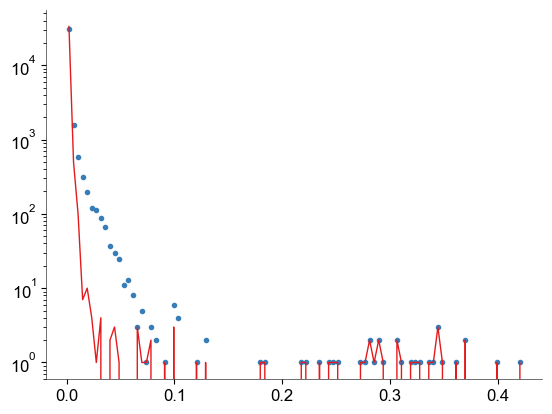

In [143]:
plt.figure()
plt.plot(corr_iter_centers, corr_iter_counts, '.')
plt.plot(corr_shuffled_iter_centers, corr_shuffled_iter_counts, '-')
plt.yscale('log')
plt.show()

In [82]:
counts_new, bin_edges_new = np.histogram(corr_new_aln.flatten(), 100)
counts_iter, bin_edges_iter = np.histogram(corr_iter_aln.flatten(), 100)
bin_centres_new = (bin_edges_new[:-1] + bin_edges_new[1:])/2.
bin_centres_iter = (bin_edges_iter[:-1] + bin_edges_iter[1:])/2.

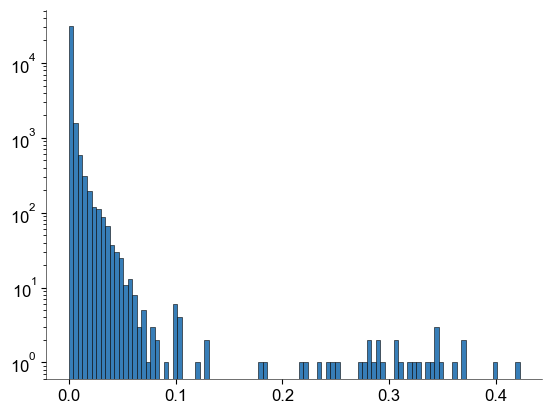

In [100]:
plt.hist(corr[np.triu_indices(260)], bins=100)
plt.hist(corr[])
plt.yscale('log')
plt.show()

In [110]:
corr_new_aln = np.genfromtxt('../data/corr_iter.csv', delimiter=',', dtype=float)
corr_iter_aln = np.genfromtxt('../data/corr_shuffled_iter.csv', delimiter=',', dtype=float)

In [111]:
np.sum(corr_iter_aln > 1.)

0

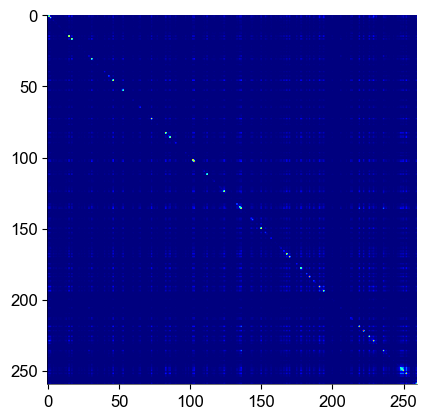

In [112]:
plt.figure()
plt.imshow(corr_new_aln, cmap='jet')
plt.show()

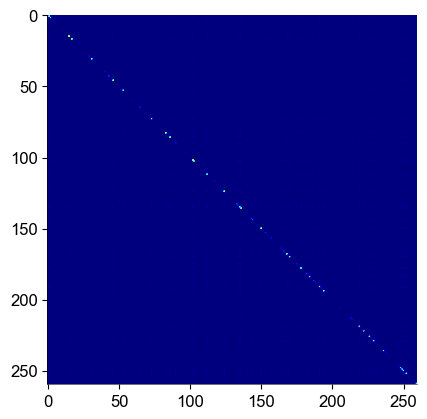

In [113]:
plt.figure()
plt.imshow(corr_iter_aln, cmap='jet')
plt.show()

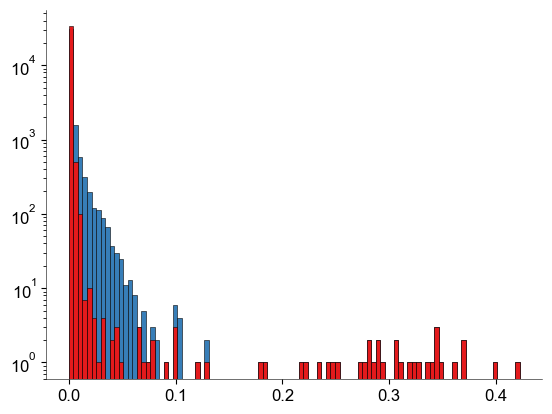

In [114]:
plt.hist(corr_new_aln[np.triu_indices(260)], bins=100)
plt.hist(corr_iter_aln[np.triu_indices(260)], bins=100)
plt.yscale('log')
plt.show()

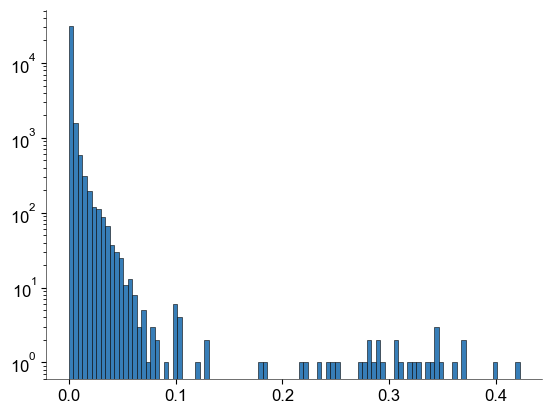

In [109]:
# plt.hist(corr_new_aln[np.triu_indices(639)], bins=100)
plt.hist(corr_iter_aln[np.triu_indices(260)], bins=100)
plt.yscale('log')
plt.show()

In [82]:
counts_new, bin_edges_new = np.histogram(corr_new_aln.flatten(), 100)
counts_iter, bin_edges_iter = np.histogram(corr_iter_aln.flatten(), 100)
bin_centres_new = (bin_edges_new[:-1] + bin_edges_new[1:])/2.
bin_centres_iter = (bin_edges_iter[:-1] + bin_edges_iter[1:])/2.

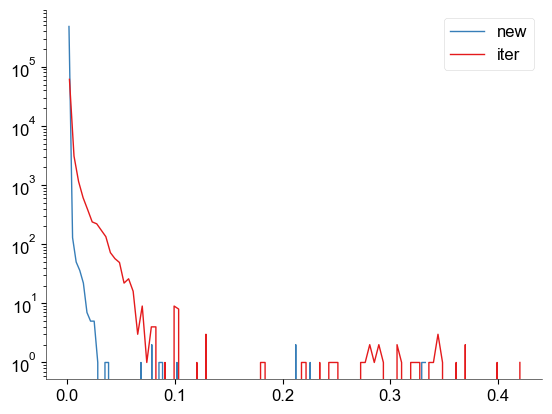

In [93]:
plt.figure()
plt.plot(bin_centres_new, counts_new, '-', label='new')
plt.plot(bin_centres_iter, counts_iter, '-', label='iter')
plt.yscale('log')
plt.legend()
plt.show()

In [68]:
c_sub = np.genfromtxt('../corrmatrix/corr_subsample.csv', delimiter=',', dtype=float)
c_subiter = np.genfromtxt('../corrmatrix/corr_iter_subsample.csv', delimiter=',', dtype=float)

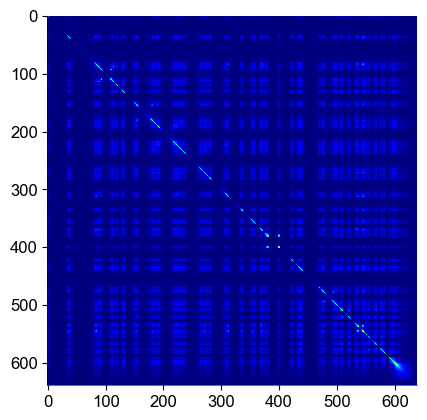

In [59]:
plt.figure()
plt.imshow(corr_new_aln_old, cmap='jet')
plt.show()

In [60]:
corr_new_aln_old.shape

(639, 639)

In [61]:
np.triu_indices(639)

(array([  0,   0,   0, ..., 637, 637, 638]),
 array([  0,   1,   2, ..., 637, 638, 638]))

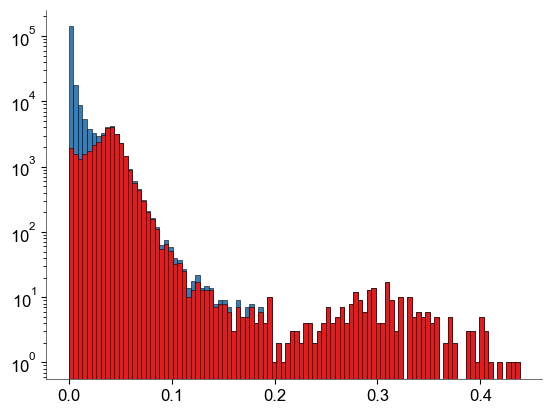

In [69]:
plt.hist(c_sub[np.triu_indices(639)], bins=100)
plt.hist(c_subiter[np.triu_indices(260)], bins=100)
plt.yscale('log')
plt.show()